# Creating a DataFrame

In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#  Import and read the data 
violent_crime_df = pd.read_csv("Resources/NYPD_Complaint_Data.csv")
violent_crime_df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,854455675,48,NaN,09/29/2021,12:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,<18,BLACK HISPANIC,M,1016838,250252,40.853507,-73.882203,"(40.85350696200004, -73.88220309599996)",POINT (-73.88220309599996 40.85350696200004)
1,474078722,79,NaN,09/16/2021,05:15:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1001523,192971,40.696329,-73.937711,"(40.696328949000076, -73.93771061299998)",POINT (-73.93771061299998 40.696328949000076)
2,843162354,25,NaN,09/15/2021,01:13:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1001508,232696,40.805364,-73.937663,"(40.80536404400005, -73.93766276299993)",POINT (-73.93766276299993 40.80536404400005)
3,275119984,47,NaN,09/07/2021,19:35:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1023942,264415,40.892351,-73.856440,"(40.89235092600006, -73.85643985999997)",POINT (-73.85643985999997 40.89235092600006)
4,446379952,47,NaN,09/03/2021,20:35:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1027062,262581,40.887303,-73.845167,"(40.88730259600004, -73.84516691)",POINT (-73.84516691 40.88730259600004)


In [31]:
# Get the datatypes and Null Values for each column
violent_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83516 entries, 46 to 323814
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         83516 non-null  int64  
 1   ADDR_PCT_CD        83516 non-null  int64  
 2   BORO_NM            83516 non-null  object 
 3   CMPLNT_FR_DT       83516 non-null  object 
 4   CMPLNT_FR_TM       83516 non-null  object 
 5   CMPLNT_TO_DT       83516 non-null  object 
 6   CMPLNT_TO_TM       83516 non-null  object 
 7   CRM_ATPT_CPTD_CD   83516 non-null  object 
 8   JURISDICTION_CODE  83516 non-null  float64
 9   JURIS_DESC         83516 non-null  object 
 10  KY_CD              83516 non-null  int64  
 11  LAW_CAT_CD         83516 non-null  object 
 12  LOC_OF_OCCUR_DESC  83516 non-null  object 
 13  OFNS_DESC          83516 non-null  object 
 14  PATROL_BORO        83516 non-null  object 
 15  PD_CD              83516 non-null  float64
 16  PD_DESC            8

In [33]:
# Get summary statistics for numerical columns
violent_crime_df.describe()

,CMPLNT_NUM,ADDR_PCT_CD,JURISDICTION_CODE,KY_CD,PD_CD,Latitude,Longitude,VIOLENT_CRIME
count,8.351600e+04,83516.000000,83516.000000,83516.000000,83516.000000,83516.000000,83516.000000,83516.000000
mean,5.521936e+08,67.329649,0.474592,352.898738,384.888225,40.732815,-73.918452,0.354136
std,2.594543e+08,33.557832,4.394754,177.897615,246.802657,0.085609,0.080196,0.478253
min,1.000026e+08,1.000000,0.000000,103.000000,100.000000,40.499401,-74.252851,0.000000
25%,3.290479e+08,42.000000,0.000000,126.000000,109.000000,40.667457,-73.958271,0.000000
50%,5.542297e+08,67.000000,0.000000,344.000000,352.000000,40.725442,-73.920992,0.000000
75%,7.758289e+08,102.000000,0.000000,578.000000,638.000000,40.813202,-73.874905,1.000000
max,9.999864e+08,123.000000,97.000000,678.000000,922.000000,40.912723,-73.701324,1.000000


In [35]:
# Explore the percentage of null values in each column
violent_crime_df.isna().mean() * 100

CMPLNT_NUM           0.0
ADDR_PCT_CD          0.0
BORO_NM              0.0
CMPLNT_FR_DT         0.0
CMPLNT_FR_TM         0.0
CMPLNT_TO_DT         0.0
CMPLNT_TO_TM         0.0
CRM_ATPT_CPTD_CD     0.0
JURISDICTION_CODE    0.0
JURIS_DESC           0.0
KY_CD                0.0
LAW_CAT_CD           0.0
LOC_OF_OCCUR_DESC    0.0
OFNS_DESC            0.0
PATROL_BORO          0.0
PD_CD                0.0
PD_DESC              0.0
PREM_TYP_DESC        0.0
RPT_DT               0.0
SUSP_AGE_GROUP       0.0
SUSP_RACE            0.0
SUSP_SEX             0.0
VIC_AGE_GROUP        0.0
VIC_RACE             0.0
VIC_SEX              0.0
Latitude             0.0
Longitude            0.0
VIOLENT_CRIME        0.0
dtype: float64

In [2]:
# Drop Unneccessary Columns
violent_crime_df = violent_crime_df.drop(columns=["HADEVELOPT","HOUSING_PSA","PARKS_NM","STATION_NAME",
                                                      "TRANSIT_DISTRICT","X_COORD_CD","Y_COORD_CD",
                                                     "Lat_Lon","New Georeferenced Column"])

# Drop Rows with Null Values
violent_crime_df = violent_crime_df.dropna()

In [3]:
#Explore the Shape of the Data
violent_crime_df.shape

(201853, 27)

In [4]:
# See Value Counts for Offense Descriptions
violent_crime_df["OFNS_DESC"].value_counts()

HARRASSMENT 2                           41901
PETIT LARCENY                           39230
ASSAULT 3 & RELATED OFFENSES            24811
CRIMINAL MISCHIEF & RELATED OF          15857
GRAND LARCENY                           15245
FELONY ASSAULT                          11679
OFF. AGNST PUB ORD SENSBLTY &            9996
MISCELLANEOUS PENAL LAW                  7937
ROBBERY                                  6358
BURGLARY                                 6156
SEX CRIMES                               3349
GRAND LARCENY OF MOTOR VEHICLE           3227
OFFENSES AGAINST PUBLIC ADMINI           2966
DANGEROUS DRUGS                          2425
THEFT-FRAUD                              1308
DANGEROUS WEAPONS                        1171
CRIMINAL TRESPASS                        1122
RAPE                                      899
FRAUDS                                    880
VEHICLE AND TRAFFIC LAWS                  787
UNAUTHORIZED USE OF A VEHICLE             667
FORGERY                           

In [5]:
# Group violent crimes into list
violent_crimes = ["ASSAULT 3 & RELATED OFFENSES","FELONY ASSAULT","ROBBERY",
 "RAPE","HOMICIDE-NEGLIGENT,UNCLASSIFIE",
 "HOMICIDE-NEGLIGENT,UNCLASSIFIE"]

In [6]:
# Add violent crime column in dataframe
violent_crime_df["VIOLENT_CRIME"] = 0
violent_crime_df["VIOLENT_CRIME"]

46        0
47        0
49        0
52        0
53        0
         ..
323808    0
323810    0
323811    0
323814    0
323816    0
Name: VIOLENT_CRIME, Length: 201853, dtype: int64

In [7]:
# Add 1 if violent or keep 0 for non-violent crime
violent_crime_df.loc[(violent_crime_df.OFNS_DESC == "ASSAULT 3 & RELATED OFFENSES") |
                     (violent_crime_df.OFNS_DESC == "FELONY ASSAULT") |
                     (violent_crime_df.OFNS_DESC == "ROBBERY") |
                     (violent_crime_df.OFNS_DESC == "RAPE") |
                     (violent_crime_df.OFNS_DESC == "HOMICIDE-NEGLIGENT,UNCLASSIFIE") |
                     (violent_crime_df.OFNS_DESC == "HOMICIDE-NEGLIGENT,UNCLASSIFIE"), "VIOLENT_CRIME"] = 1
violent_crime_df[["OFNS_DESC", "VIOLENT_CRIME"]].head(10)

,OFNS_DESC,VIOLENT_CRIME
46,OFFENSES AGAINST PUBLIC ADMINI,0
47,ASSAULT 3 & RELATED OFFENSES,1
49,FELONY ASSAULT,1
52,ASSAULT 3 & RELATED OFFENSES,1
53,ROBBERY,1
55,PETIT LARCENY,0
56,SEX CRIMES,0
58,GRAND LARCENY,0
59,HARRASSMENT 2,0
60,CRIMINAL MISCHIEF & RELATED OF,0


# Clean victim and suspect age ranges

In [8]:
# Remove Age Values for victims That don't make sense
violent_crime_df = violent_crime_df.loc[((violent_crime_df['VIC_AGE_GROUP'] == "<18") |
                                            (violent_crime_df['VIC_AGE_GROUP'] == "18-24") |
                                            (violent_crime_df['VIC_AGE_GROUP'] == "25-44") |
                                            (violent_crime_df['VIC_AGE_GROUP'] == "45-64") |
                                           (violent_crime_df['VIC_AGE_GROUP'] == "65+"))]

In [9]:
# Remove Age Values for Suspects That don't make sense
violent_crime_df = violent_crime_df.loc[((violent_crime_df['SUSP_AGE_GROUP'] == "<18") |
                                            (violent_crime_df['SUSP_AGE_GROUP'] == "18-24") |
                                            (violent_crime_df['SUSP_AGE_GROUP'] == "25-44") |
                                            (violent_crime_df['SUSP_AGE_GROUP'] == "45-64") |
                                           (violent_crime_df['SUSP_AGE_GROUP'] == "65+"))]

In [10]:
violent_crime_df['VIC_AGE_GROUP'].value_counts()

25-44    43116
45-64    20387
18-24    11363
<18       4335
65+       4315
Name: VIC_AGE_GROUP, dtype: int64

In [11]:
violent_crime_df['SUSP_AGE_GROUP'].value_counts()

25-44    48701
45-64    16964
18-24    12941
<18       2722
65+       2188
Name: SUSP_AGE_GROUP, dtype: int64

# Export to CSV

In [12]:
# Write new dataframe to CSV
violent_crime_df.to_csv("./Resources/violent_crime_v2.csv")

## Creating the Balanced Random Forest Classifier Model

In [15]:
#Drop columns that are not necessary for analysis
rfm_violent_crime_df = violent_crime_df.drop(columns=["CMPLNT_NUM","Latitude","Longitude","OFNS_DESC","RPT_DT","PD_DESC","CMPLNT_TO_TM","CMPLNT_TO_DT",
                                                     "KY_CD","PD_CD"])
rfm_violent_crime_df.shape

(83516, 18)

In [16]:
#Convert dates into datetime
rfm_violent_crime_df["CMPLNT_FR_DT"] = pd.to_datetime(rfm_violent_crime_df['CMPLNT_FR_DT'],errors = 'coerce')
rfm_violent_crime_df["CMPLNT_FR_TM"] = pd.to_datetime(rfm_violent_crime_df['CMPLNT_FR_TM'],format="%H:%M:%S",errors = 'coerce')
rfm_violent_crime_df.dtypes

ADDR_PCT_CD                   int64
BORO_NM                      object
CMPLNT_FR_DT         datetime64[ns]
CMPLNT_FR_TM         datetime64[ns]
CRM_ATPT_CPTD_CD             object
JURISDICTION_CODE           float64
JURIS_DESC                   object
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
PATROL_BORO                  object
PREM_TYP_DESC                object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
VIC_AGE_GROUP                object
VIC_RACE                     object
VIC_SEX                      object
VIOLENT_CRIME                 int64
dtype: object

In [17]:
#greater than the start date and smaller than the end date
start_date = '2020-12-31'
end_date = '2022-01-01'
mask = (rfm_violent_crime_df['CMPLNT_FR_DT'] > start_date) & (rfm_violent_crime_df['CMPLNT_FR_DT'] <= end_date)
rfm_violent_crime_df = rfm_violent_crime_df.loc[mask]

In [18]:
#Convert dates to unix time
import time
import datetime
rfm_violent_crime_df['CMPLNT_FR_DT'] = (pd.to_datetime(rfm_violent_crime_df['CMPLNT_FR_DT']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
rfm_violent_crime_df['CMPLNT_FR_TM'] = (pd.to_datetime(rfm_violent_crime_df['CMPLNT_FR_TM']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [20]:
#Use Label Encoding on Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rfm_violent_crime_df['BORO_NM'] = le.fit_transform(rfm_violent_crime_df['BORO_NM']) 
rfm_violent_crime_df["CRM_ATPT_CPTD_CD"] = le.fit_transform(rfm_violent_crime_df["CRM_ATPT_CPTD_CD"])
rfm_violent_crime_df["JURIS_DESC"] = le.fit_transform(rfm_violent_crime_df["JURIS_DESC"]) 
rfm_violent_crime_df["LAW_CAT_CD"] = le.fit_transform(rfm_violent_crime_df["LAW_CAT_CD"]) 
rfm_violent_crime_df["LOC_OF_OCCUR_DESC"] = le.fit_transform(rfm_violent_crime_df["LOC_OF_OCCUR_DESC"]) 
rfm_violent_crime_df["PATROL_BORO"] = le.fit_transform(rfm_violent_crime_df["PATROL_BORO"]) 
rfm_violent_crime_df["PREM_TYP_DESC"] = le.fit_transform(rfm_violent_crime_df["PREM_TYP_DESC"]) 
rfm_violent_crime_df["SUSP_AGE_GROUP"] = le.fit_transform(rfm_violent_crime_df["SUSP_AGE_GROUP"]) 
rfm_violent_crime_df["SUSP_RACE"] = le.fit_transform(rfm_violent_crime_df["SUSP_RACE"]) 
rfm_violent_crime_df["SUSP_SEX"] = le.fit_transform(rfm_violent_crime_df["SUSP_SEX"]) 
rfm_violent_crime_df["VIC_AGE_GROUP"] = le.fit_transform(rfm_violent_crime_df["VIC_AGE_GROUP"]) 
rfm_violent_crime_df["VIC_RACE"] = le.fit_transform(rfm_violent_crime_df["VIC_RACE"]) 
rfm_violent_crime_df["VIC_SEX"] = le.fit_transform(rfm_violent_crime_df["VIC_SEX"]) 

x_cols = [i for i in rfm_violent_crime_df if i not in ('VIOLENT_CRIME')]
X = rfm_violent_crime_df[x_cols]

# Create our target
y = rfm_violent_crime_df["VIOLENT_CRIME"]

In [22]:
X.describe()

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PATROL_BORO,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,81504.000000,81504.000000,8.150400e+04,8.150400e+04,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000,81504.000000
mean,67.302648,1.603161,1.621615e+09,-2.208940e+09,0.985596,0.478112,4.876190,1.044059,0.779545,2.922826,49.692481,1.195549,3.348044,0.769913,1.354878,3.519324,2.351995
std,33.554438,1.202800,6.759114e+06,2.380954e+04,0.119151,4.425468,0.428367,0.759101,0.523111,2.133383,10.043869,0.844013,1.786323,0.466438,0.941144,1.869776,0.478006
min,1.000000,0.000000,1.609459e+09,-2.208989e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,1.615766e+09,-2.208956e+09,1.000000,0.000000,5.000000,0.000000,0.000000,1.000000,51.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000
50%,67.000000,1.000000,1.621901e+09,-2.208937e+09,1.000000,0.000000,5.000000,1.000000,1.000000,2.000000,51.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000
75%,102.000000,3.000000,1.627430e+09,-2.208920e+09,1.000000,0.000000,5.000000,2.000000,1.000000,5.000000,53.000000,2.000000,5.000000,1.000000,2.000000,6.000000,3.000000
max,123.000000,4.000000,1.632960e+09,-2.208902e+09,1.000000,97.000000,11.000000,2.000000,3.000000,7.000000,69.000000,4.000000,6.000000,2.000000,4.000000,6.000000,3.000000


In [23]:
#Look at y value counts for binning
y_counts = y.value_counts()
y_counts

0    52398
1    29106
Name: VIOLENT_CRIME, dtype: int64

In [24]:
#Create training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model = brf_model.fit(X_train, y_train)

In [25]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.753208462907651

In [26]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
   cm, index=["Actual Violent", "Actual Nonviolent"],
   columns=["Predicted Violent", "Predicted Nonviolent"]
)
display(cm_df)

,Predicted Violent,Predicted Nonviolent
Actual Violent,8097,5002
Actual Nonviolent,813,6464


In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.62      0.89      0.74      0.74      0.53     13099
          1       0.56      0.89      0.62      0.69      0.74      0.56      7277

avg / total       0.79      0.71      0.79      0.72      0.74      0.54     20376



In [28]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brf_model.feature_importances_, X.columns), reverse = True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

LAW_CAT_CD: (0.32570780305139785)
CMPLNT_FR_DT: (0.14411698135554593)
CMPLNT_FR_TM: (0.14056837363113714)
ADDR_PCT_CD: (0.09660062963276304)
PREM_TYP_DESC: (0.04538258534127455)
VIC_AGE_GROUP: (0.03706019452728231)
VIC_RACE: (0.03600442023807091)
SUSP_RACE: (0.03554637919825231)
SUSP_AGE_GROUP: (0.03476515411888025)
PATROL_BORO: (0.025222382841508035)
LOC_OF_OCCUR_DESC: (0.01989960238897363)
SUSP_SEX: (0.01796428915360366)
BORO_NM: (0.014502401837091441)
VIC_SEX: (0.010457178939354408)
JURISDICTION_CODE: (0.006037896940416318)
JURIS_DESC: (0.005980530867212766)
CRM_ATPT_CPTD_CD: (0.004183195937235426)


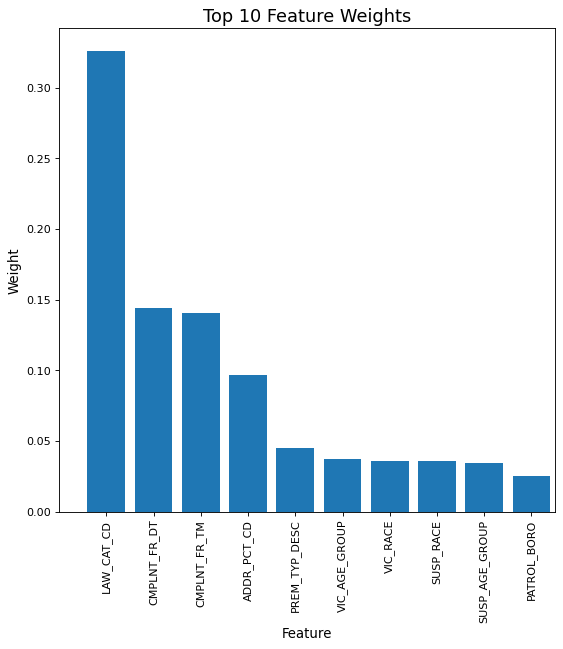

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi = 80)

features = brf_model.feature_importances_
plt.bar(x = range(len(features)), height = sorted(features, reverse = True))
bars = [row[1] for row in features_rank[0:10]]
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, color='black', rotation = 90, fontsize='10')
plt.xlim([-1, 9.5])
plt.ylabel('Weight',fontsize = '12')
plt.xlabel('Feature', fontsize = '12')
plt.title('Top 10 Feature Weights', fontsize = '16')
plt.show()